<a href="https://colab.research.google.com/github/shalini-03-03-2006/Codsoft_task3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

In [ ]:
import pandas as pd
df=pd.read_excel('/content/iris.xlsx')
print(df)
df = df.drop_duplicates()
df = df.dropna()
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width         species
0             

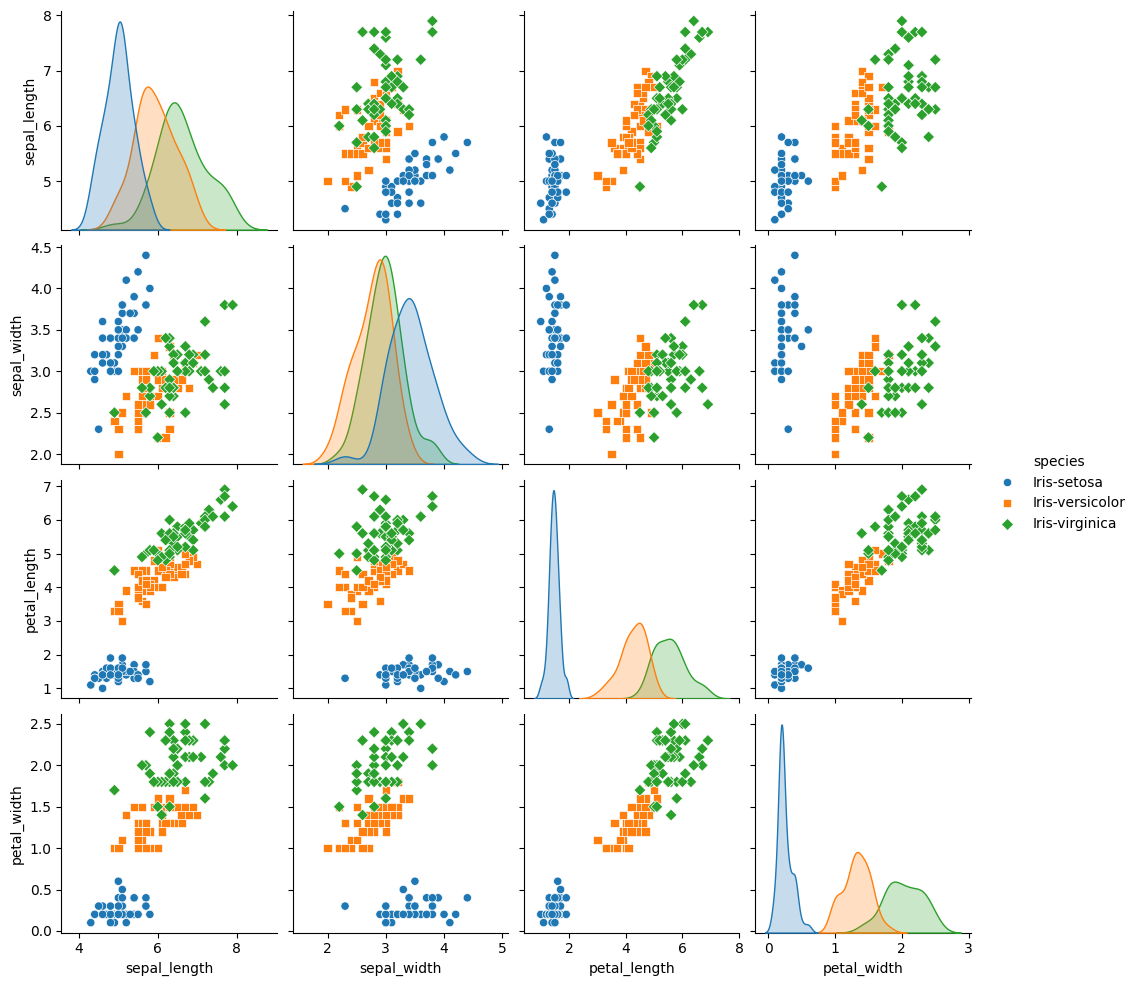

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the data
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df.iloc[:, :-1]  # Features
y = df['species']     # Labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9333333333333333
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


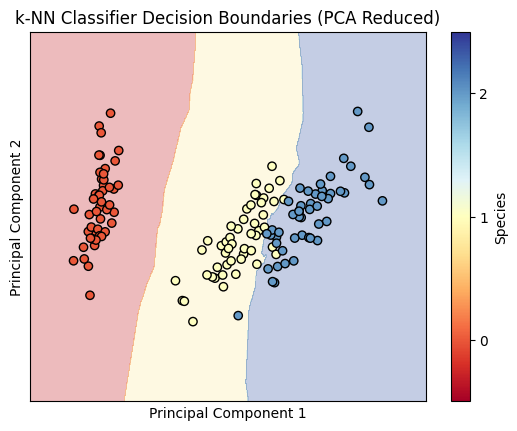

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a mesh grid for plotting
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the species for each point in the mesh grid using the original features
# We need to transform the mesh grid points back to the original 4-dimensional space
# and then predict using the original knn model
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Convert species labels to numerical values for plotting
le = LabelEncoder()
y_numeric = le.fit_transform(y)
Z_numeric = le.transform(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, edgecolor='k', marker='o', cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('k-NN Classifier Decision Boundaries (PCA Reduced)')
plt.colorbar(ticks=range(len(le.classes_)), label='Species')
plt.clim(-0.5, len(le.classes_) - 0.5) # Adjust colorbar limits
plt.xticks(()) # Hide x-axis ticks
plt.yticks(()) # Hide y-axis ticks

plt.show()

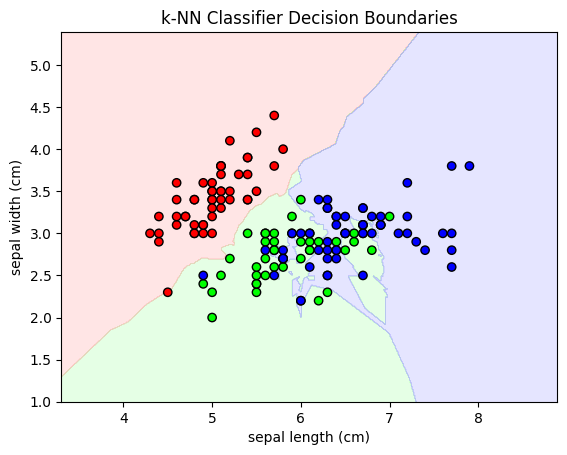

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Taking only first 2 features for 2D plotting
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('k-NN Classifier Decision Boundaries')
plt.show()